In [1]:
import logging
from IPython.core.interactiveshell import InteractiveShell
%load_ext autoreload
InteractiveShell.ast_node_interactivity = "all"

logging.basicConfig(
    level=logging.DEBUG, format="%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)

In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd

hela_ss = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/tims_ramp_time/combined/txt/evidence.txt", sep="\t"
)
hela_120min = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/tims_ramp_time/HeLa_library/txt_Hela_DDA_120min/evidence.txt",
    sep="\t",
)
hela_off = pd.read_csv(
    "/cmnfs/proj/ORIGINS/data/tims_ramp_time/HeLa_library/txt_Hela_Deep/evidence.txt",
    sep="\t",
)

2024-08-22 14:31:52,639 - numexpr.utils - INFO - Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-08-22 14:31:52,640 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
/tmp/ipykernel_216148/693864267.py:3: DtypeWarning: Columns (62,70) have mixed types. Specify dtype option on import or set low_memory=False.
  hela_ss = pd.read_csv(
/tmp/ipykernel_216148/693864267.py:10: DtypeWarning: Columns (61,69) have mixed types. Specify dtype option on import or set low_memory=False.
  hela_off = pd.read_csv(


In [4]:
base_df = pd.read_csv(
    "/cmnfs/proj/ORIGINS/SWAPS_exp/detectebility/Processed_and_DL_Results_Cory_12_08_2024/Results/uniprot-proteome_human_reviewed_canonical_20220419_digest_results_base_model.csv"
)
fine_tune_df = pd.read_csv(
    "/cmnfs/proj/ORIGINS/SWAPS_exp/detectebility/Processed_and_DL_Results_Cory_12_08_2024/Results/uniprot-proteome_human_reviewed_canonical_20220419_digest_results_fine_tuned_model.csv"
)

In [5]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt


def compare_flyer_pred(
    maxquant_df, base_df, compare_col="Multi", flyer_type=["Strong Flyer"]
):
    maxquant_df_copy = maxquant_df.loc[maxquant_df["Missed cleavages"] == 0]
    maxquant_df_copy = maxquant_df_copy.drop_duplicates(subset=["Sequence"])

    base_df_copy = base_df.drop_duplicates(subset=["Sequences"])
    before_shape = maxquant_df_copy.shape
    maxquant_df_copy = maxquant_df_copy.loc[
        maxquant_df_copy["Sequence"].isin(base_df["Sequences"])
    ]
    logging.info(
        f"Maxquant df shape %s, %s entries are removed",
        maxquant_df_copy.shape,
        before_shape[0] - maxquant_df_copy.shape[0],
    )
    # fine_tune_df.drop_duplicates(subset=["Sequence"], inplace=True)
    if compare_col == "Multi":

        # Get the set of strong flyers in base_df
        pred = set(
            base_df_copy[base_df_copy["Predictions"].isin(flyer_type)]["Sequences"]
        )
    elif compare_col == "Binary":
        pred = set(
            base_df_copy[base_df_copy["Binary Predictions"] == "Flyer"]["Sequences"]
        )

    # Create a Venn diagram
    venn2(
        [pred, set(maxquant_df_copy["Sequence"])],
        set_labels=("Predicted " + "+".join(flyer_type), "Maxquant result"),
    )
    plt.title("+".join(flyer_type))
    plt.show()

2024-08-22 14:32:10,764 - matplotlib - DEBUG - matplotlib data path: /cmnfs/home/z.xiao/.local/lib/python3.10/site-packages/matplotlib/mpl-data
2024-08-22 14:32:10,770 - matplotlib - DEBUG - CONFIGDIR=/cmnfs/home/z.xiao/.config/matplotlib
2024-08-22 14:32:10,773 - matplotlib - DEBUG - interactive is False
2024-08-22 14:32:10,773 - matplotlib - DEBUG - platform is linux
2024-08-22 14:32:10,874 - matplotlib - DEBUG - CACHEDIR=/cmnfs/home/z.xiao/.cache/matplotlib
2024-08-22 14:32:10,881 - matplotlib.font_manager - DEBUG - Using fontManager instance from /cmnfs/home/z.xiao/.cache/matplotlib/fontlist-v330.json


In [6]:
base_df["Predictions"].unique()

array(['Strong Flyer', 'Intermediate Flyer', 'Non-Flyer', 'Weak Flyer'],
      dtype=object)

2024-08-22 14:37:16,374 - root - INFO - Maxquant df shape (130792, 71), 6998 entries are removed


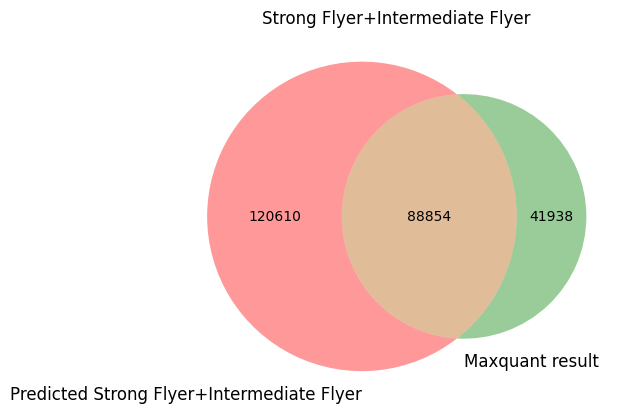

In [17]:
compare_flyer_pred(
    hela_off,
    fine_tune_df,
    flyer_type=["Strong Flyer", "Intermediate Flyer"],
)

2024-08-22 14:33:52,875 - root - INFO - Maxquant df shape (37899, 74), 1310 entries are removed


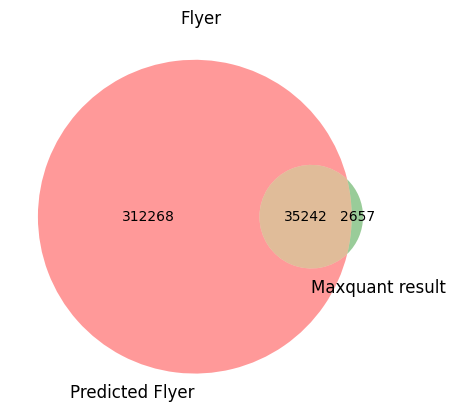

In [10]:
compare_flyer_pred(hela_ss, fine_tune_df, compare_col="Binary", flyer_type=["Flyer"])

2024-08-22 14:33:09,526 - root - INFO - Maxquant df shape (57045, 70), 2117 entries are removed


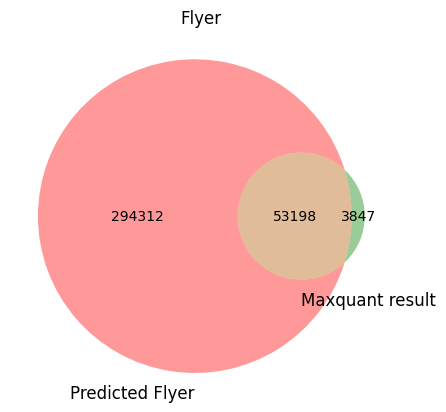

In [9]:
compare_flyer_pred(
    hela_120min, fine_tune_df, compare_col="Binary", flyer_type=["Flyer"]
)

2024-08-22 14:33:57,698 - root - INFO - Maxquant df shape (130792, 71), 6998 entries are removed


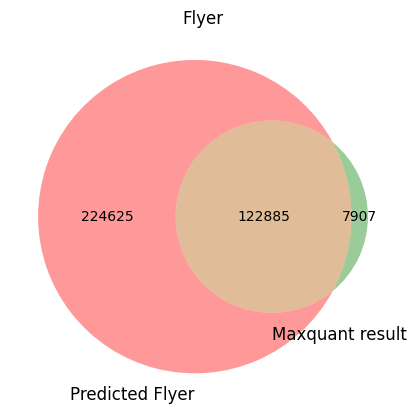

In [11]:
compare_flyer_pred(hela_off, fine_tune_df, compare_col="Binary", flyer_type=["Flyer"])